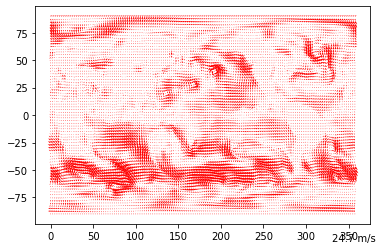

In [12]:
import xarray as xr
import matplotlib.pyplot as plt
import datetime
import numpy as np

fname='May2000-uvt.nc'
ds = xr.open_dataset(fname)

#select data for quiver
date1 = datetime.datetime(year=2000,day=10,month=5)
u=ds.u.sel(level=1000.0, time=date1, method="nearest")
v=ds.v.sel(level=1000.0, time=date1,  method="nearest")
x=ds.longitude
y=ds.latitude

wmax=np.amax(np.sqrt(u**2+v**2)).values #find maximal windspeed in data
ax=plt.gca()
qv=ax.quiver(x,y, u, v,  angles="uv", color="red")
q_typ=wmax
Qkey = ax.quiverkey(qv, 0.95, -0.12 , q_typ, '%.1f m/s' % q_typ, coordinates='axes')

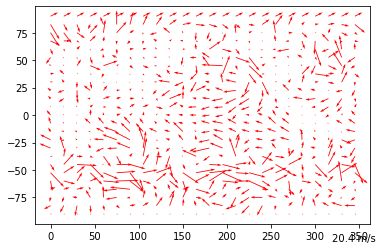

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
import datetime
import numpy as np

fname='May2000-uvt.nc'
ds = xr.open_dataset(fname)

#select data for quiver
date1 = datetime.datetime(year=2000,day=10,month=5)
u=ds.u.sel(level=1000.0, time=date1, method="nearest")
v=ds.v.sel(level=1000.0, time=date1,  method="nearest")
x=ds.longitude
y=ds.latitude

#regrid data so that the plot is readable
qsx=6        # step along x axis
qsy=3        # step along y axis
x=x.isel(longitude=slice(0,144,qsx))
y=y.isel(latitude=slice(0,73,qsy))
u=u.isel(longitude=slice(0,144,qsx),latitude=slice(0,73,qsy))
v=v.isel(longitude=slice(0,144,qsx),latitude=slice(0,73,qsy))

wmax=np.amax(np.sqrt(u**2+v**2)).values #find maximal windspeed in data
ax=plt.gca()
qv=ax.quiver(x,y, u, v,  angles="uv", color="red")
q_typ=wmax
Qkey = ax.quiverkey(qv, 0.95, -0.12 , q_typ, '%.1f m/s' % q_typ, coordinates='axes')